In [6]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 

df=pd.read_csv("2019.csv")

df.drop(["Rk","2PM","2PP","FantPt","DKPt","FDPt","VBD","PosRank","OvRank","PPR","Fmb","GS"], axis=1, inplace=True)

#Remember that the excel sheet has players with special characters that need to be taken off
df["Player"]=df["Player"].apply(lambda x: x.split("*")[0]).apply(lambda x: x.split("\\")[0])

df.rename({
    "TD":"PassingTD",
    "TD.1":"RushingTD",
    "TD.2":"ReceivingTD",
    "TD.3":"TotalTD",
    "Yds":"PassingYDs",
    "Yds.1":"RushingYDs",
    "Yds.2":"ReceivingYDs",
    "Att":"PassingAtt",
    "Att.1":"RushingAtt"
}, axis=1, inplace=True)



In [3]:
#SEPERATING DATAFRAMES BASED OFF POSITION
#For the remainder of the program, we are using the RB dataframe
rb_df=df[df["FantPos"]=="RB"]
qb_df=df[df["FantPos"]=="QB"]
wr_df=df[df["FantPos"]=="WR"]
te_df=df[df["FantPos"]=="TE"]

In [4]:
#Fitlering our dataframes based off these column values
rushing_columns=["RushingAtt","RushingYDs","Y/A","RushingTD",]
receiving_columns=["Tgt","Rec","ReceivingYDs","Y/R","ReceivingTD"]
passing_columns=["PassingAtt","PassingYDs","PassingTD","Int"]

In [7]:
#transform_columns takes two arguments- a dataframe and a column list
#It returns a filtered dataframe with our passed in columns
#Basically adding to column
def transform_columns(df, new_column_list):
  df=df[["Player","Tm","Age","G"]+ new_column_list + ["FL"]]
  return df

In [8]:
rb_df= transform_columns(rb_df, rushing_columns+receiving_columns)
wr_df= transform_columns(wr_df, rushing_columns+ receiving_columns)
te_df= transform_columns(te_df, receiving_columns)
qb_df= transform_columns(qb_df, passing_columns)

                      

In [11]:
#create new column to calculate fantasy points scored
rb_df["FantasyPoints"]=(rb_df["RushingYDs"]*0.1 + rb_df["RushingTD"]*6 +rb_df["ReceivingYDs"]*0.1 +rb_df["Rec"]+ rb_df["ReceivingTD"]*6 - rb_df["FL"]*2)

In [12]:
#Create new column for Fantasy POINTS per game
#For my own confusion, GM is basically G rewritten as a variable
rb_df["FantasyPoints/GM"]= rb_df["FantasyPoints"]/rb_df["G"]
rb_df["FantasyPoints/GM"]= rb_df["FantasyPoints/GM"].apply(lambda x: round(x, 2))

In [23]:
#Create new column for usage per game. Usage is defined as number of targets + carries
rb_df["Usage/GM"]=(rb_df["RushingAtt"]+ rb_df["Tgt"])/rb_df["G"]
#round each row value to two decimal places
rb_df["Usage/GM"]=rb_df["Usage/GM"].apply(lambda x: round(x, 2))

In [14]:
#Just for styling. We imported seaborn earlier as sns
#list of arguments in seaborn docs
sns.set_style("whitegrid")

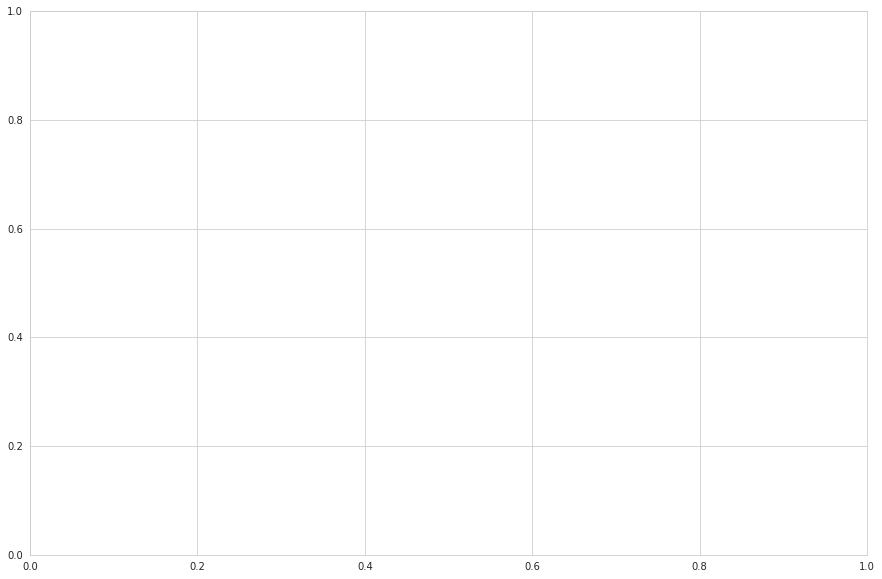

In [24]:
#create a canvas with matplotlib
#fig is the first element in the return value of subplots
#set_size_inches takes a height and width as arguments setting it for axis
fig, ax=plt.subplots()
fig.set_size_inches(15,10)

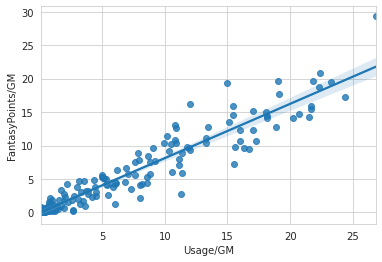

In [17]:
#basic regression scatter plot with trendline
plot= sns.regplot(
    x=rb_df["Usage/GM"],
    y=rb_df["FantasyPoints/GM"],
    scatter=True,)


In [18]:
#How does efficiency correlate to fantasy football performance
rb_df["TD/Usage"]= (rb_df["RushingTD"]+ rb_df["ReceivingTD"])/(rb_df["RushingAtt"] + rb_df["Tgt"])

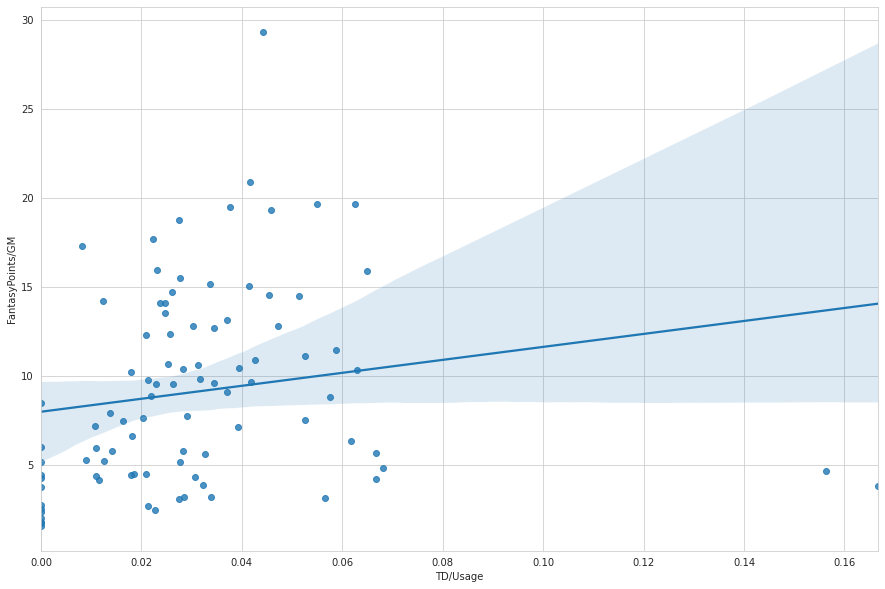

In [25]:
#Make sure there is an adequate sample size
#Seperate plot for x>20 rushing attempts
fig, ax= plt.subplots()
fig.set_size_inches(15,10)
#We are filtering out anomalies and want only players who get more than 20 Rushing Att per game
rb_df=rb_df[rb_df["RushingAtt"]> 20]

plot= sns.regplot(
    x=rb_df["TD/Usage"],
    y=rb_df["FantasyPoints/GM"],
    scatter=True)
